In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

The dataset used is "Students Performance in Exams: Marks secured by the students in various subjects" by jaki <a href="https://www.kaggle.com/spscientist/students-performance-in-exams">link</a> that has scores for different exams and different factors for 1000 students. Futher description below.

# Loading the Dataset and seeing 

In [2]:
data=pd.read_csv('datasets_74977_169835_StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


([<matplotlib.patches.Wedge at 0x1c0a4c0d788>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'female'),
  Text(0.06217041096298411, -1.0982417038160106, 'male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.033911133252536786, -0.5990409293541875, '48.2%')])

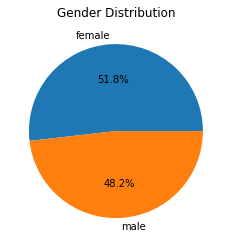

In [4]:
plt.title('Gender Distribution')
plt.pie([len(data.where(data['gender']==g).dropna()) for g in data['gender'].unique()],labels=data['gender'].unique(),autopct='%1.1f%%')

For our first categorical feature, gender, we have an even distribution almost split 50:50 between males and females in the dataset

([<matplotlib.patches.Wedge at 0x1c0a4c9c308>,
 [Text(0.9097886363331099, 0.618291708822899, 'group B'),
  Text(-0.6437648321003798, 0.8919455369868554, 'group C'),
  Text(-1.038434601178987, -0.362840983178911, 'group A'),
  Text(-0.14472078029994478, -1.0904383961276194, 'group D'),
  Text(0.9953097568356061, -0.4683572225853327, 'group E')],
 [Text(0.4962483470907872, 0.33725002299430845, '19.0%'),
  Text(-0.3511444538729344, 0.48651574744737563, '31.9%'),
  Text(-0.5664188733703563, -0.19791326355213326, '8.9%'),
  Text(-0.07893860743633352, -0.5947845797059742, '26.2%'),
  Text(0.5428962310012396, -0.255467575955636, '14.0%')])

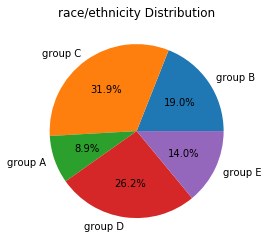

In [5]:
plt.title('race/ethnicity Distribution')
plt.pie([len(data.where(data['race/ethnicity']==g).dropna()) for g in data['race/ethnicity'].unique()],labels=data['race/ethnicity'].unique(),autopct='%1.1f%%')

When we come to our ethnic distribution in our data set we have to categories that predominate the dataset by representing more than 50% of the elements, and one that only represents a small (less than 10%) part of the elements in our data set. We can either decide to eliminate random elements from the dominat categories and/or eliminate the category that least represents our data to avoid biases. In this case, since our dataset isn´t that big, we are going to keep them all (also to see the true error of our future models and how well they behave with different data).

([<matplotlib.patches.Wedge at 0x1c0a4d03c48>,
 [Text(1.0252782228085795, 0.3985029056788436, "bachelor's degree"),
  Text(0.13100688469389565, 1.092170863996472, 'some college'),
  Text(-0.7704522508666288, 0.7851135772195926, "master's degree"),
  Text(-1.0957469709260732, -0.09663630635705887, "associate's degree"),
  Text(-0.18571680664389534, -1.0842090516731513, 'high school'),
  Text(0.9306078067899267, -0.5864887977972321, 'some high school')],
 [Text(0.5592426669864978, 0.21736522127936922, '11.8%'),
  Text(0.07145830074212489, 0.5957295621798938, '22.6%'),
  Text(-0.4202466822908884, 0.428243769392505, '5.9%'),
  Text(-0.5976801659596762, -0.052710712558395746, '22.2%'),
  Text(-0.10130007635121563, -0.5913867554580825, '19.6%'),
  Text(0.5076042582490509, -0.319902980616672, '17.9%')])

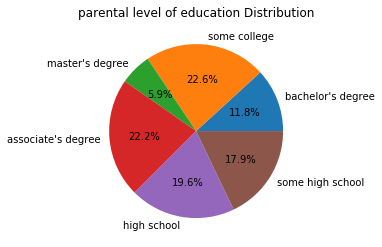

In [6]:
plt.title('parental level of education Distribution')
plt.pie([len(data.where(data['parental level of education']==g).dropna()) for g in data['parental level of education'].unique()],labels=data['parental level of education'].unique(),autopct='%1.1f%%')

Like we talked before, but in this case most of the categories represent almost a same portion of our data except for the master´s degree that only represents 6%. Nevertheless we are going to keep them to test for true error.

([<matplotlib.patches.Wedge at 0x1c0a4d6d548>,
 [Text(-0.48393302764960144, 0.9878303623344902, 'standard'),
  Text(0.48393293516224545, -0.9878304076435662, 'free/reduced')],
 [Text(-0.2639634696270553, 0.5388165612733582, '64.5%'),
  Text(0.2639634191794066, -0.5388165859873997, '35.5%')])

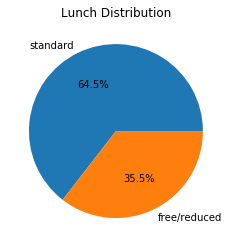

In [7]:
plt.title('Lunch Distribution')
plt.pie([len(data.where(data['lunch']==g).dropna()) for g in data['lunch'].unique()],labels=data['lunch'].unique(),autopct='%1.1f%%')

We can see the most dominant is standard lunch, but free/reduced still has a significant representation of our dataset

([<matplotlib.patches.Wedge at 0x1c0a4dc1108>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'none'),
  Text(0.4746018041084478, -0.9923472817199666, 'completed')],
 [Text(-0.2588736606535569, 0.5412803597211218, '64.2%'),
  Text(0.2588737113318806, -0.5412803354836181, '35.8%')])

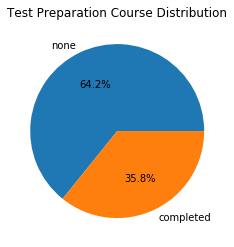

In [8]:
plt.title('Test Preparation Course Distribution')
plt.pie([len(data.where(data['test preparation course']==g).dropna()) for g in data['test preparation course'].unique()],labels=data['test preparation course'].unique(),autopct='%1.1f%%')

The same as explained above, most of the people didn´t take a course but there is still a significant amount of people that have taken them.

The following continous features have alredy been 'explained' above in data.describe()

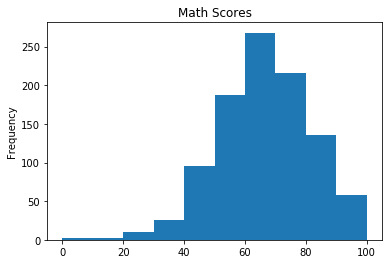

In [9]:
data['math score'].plot(kind='hist',title='Math Scores')

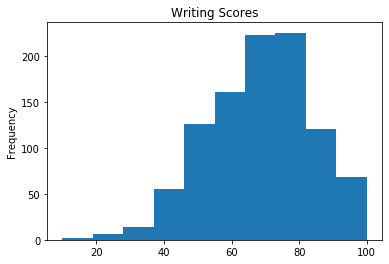

In [10]:
data['writing score'].plot(kind='hist',title='Writing Scores')

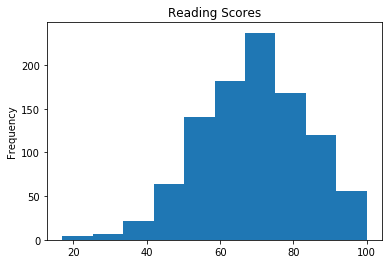

In [11]:
data['reading score'].plot(kind='hist',title='Reading Scores')

# Cleaning and Preprocessing

we have 5 categorical features (gender,race/ethnicity,parental level of education,lunch,test preparation course) and 3 numeric/continous features (math score,reading score,writing score) so to facilitate the process to create models we are going to onehot encode the categorical features and normalize the continous features and putting all together in a temproal dataframe

In [12]:
new_data=pd.DataFrame()

### Gender
it is our first categorical variable

In [13]:
print('Gender categories: ',data['gender'].unique())

Gender categories:  ['female' 'male']


Since gender is a categorical feature we have to onehot enconde it using LabelBinarizer from sklearn (female,male)->R^1

In [14]:
genderLabelBin=LabelBinarizer().fit(data['gender'].unique())
new_data['gender']=[genderLabelBin.transform([g])[0][0] for g in data['gender']]
new_data.head()

,gender
0,0
1,0
2,0
3,1
4,1


### Race/ethnic group
our second categorical feature

In [15]:
print('race/ethnicity categories: ',data['race/ethnicity'].unique())

race/ethnicity categories:  ['group B' 'group C' 'group A' 'group D' 'group E']


LabelBinarizer from sklearn ('group B' 'group C' 'group A' 'group D' 'group E')->R^5

In [16]:
raceLabelBin=LabelBinarizer().fit(data['race/ethnicity'].unique())
new_data['race']=[raceLabelBin.transform([r])[0]for r in data['race/ethnicity']]
new_data['group A']=[r[0] for r in new_data['race']]
new_data['group B']=[r[1] for r in new_data['race']]
new_data['group C']=[r[2] for r in new_data['race']]
new_data['group D']=[r[3] for r in new_data['race']]
new_data['group E']=[r[4] for r in new_data['race']]
del new_data['race']
new_data.head()

,gender,group A,group B,group C,group D,group E
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,0,1,0,0,0
3,1,1,0,0,0,0
4,1,0,0,1,0,0


### Parental Leve of education

In [17]:
print('Parental Level of Education: ',data['parental level of education'].unique())

Parental Level of Education:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


LabelBinarizer from sklearn ('group B' 'group C' 'group A' 'group D' 'group E')->R^6

In [18]:
parentLabelBin=LabelBinarizer().fit(data['parental level of education'].unique())
new_data['parental level of education']=[parentLabelBin.transform([r])[0] for r in data['parental level of education']]
new_data['associate degree']=[p[0] for p in new_data['parental level of education']]
new_data['bachelor degree']=[p[1] for p in new_data['parental level of education']]
new_data['high school']=[p[2] for p in new_data['parental level of education']]
new_data['master degree']=[p[3] for p in new_data['parental level of education']]
new_data['some college']=[p[4] for p in new_data['parental level of education']]
new_data['some high school']=[p[5] for p in new_data['parental level of education']]
del new_data['parental level of education']
new_data.head()

,gender,group A,group B,group C,group D,group E,associate degree,bachelor degree,high school,master degree,some college,some high school
0,0,0,1,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0
3,1,1,0,0,0,0,1,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,1,0


### Lunch

In [19]:
print('Lunch: ',data['lunch'].unique())

Lunch:  ['standard' 'free/reduced']


In [20]:
lunchLabelBin=LabelBinarizer().fit(data['lunch'].unique())
new_data['lunch']=lunchLabelBin.transform(data['lunch'])
new_data.head()

,gender,group A,group B,group C,group D,group E,associate degree,bachelor degree,high school,master degree,some college,some high school,lunch
0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,1,0,1
2,0,0,1,0,0,0,0,0,0,1,0,0,1
3,1,1,0,0,0,0,1,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,1,0,1


### Test preparation course

In [21]:
print('test preparation course: ',data['test preparation course'].unique())

test preparation course:  ['none' 'completed']


In [22]:
testLabelBin=LabelBinarizer().fit(data['test preparation course'].unique())
new_data['test preparation course']=testLabelBin.transform(data['test preparation course'])
new_data.head()

,gender,group A,group B,group C,group D,group E,associate degree,bachelor degree,high school,master degree,some college,some high school,lunch,test preparation course
0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0,0,1,1
3,1,1,0,0,0,0,1,0,0,0,0,0,0,1
4,1,0,0,1,0,0,0,0,0,0,1,0,1,1


### Normalizing continous features

In [23]:
new_data['math score']=data['math score']/100
new_data['reading score']=data['reading score']/100
new_data['writing score']=data['writing score']/100
new_data['average score']=[(new_data['math score'].iloc[i]+new_data['writing score'].iloc[i]+new_data['reading score'].iloc[i])/3 for i in range(len(new_data))]
new_data.head()

,gender,group A,group B,group C,group D,group E,associate degree,bachelor degree,high school,master degree,some college,some high school,lunch,test preparation course,math score,reading score,writing score,average score
0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0.72,0.72,0.74,0.726667
1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0.69,0.90,0.88,0.823333
2,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0.90,0.95,0.93,0.926667
3,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0.47,0.57,0.44,0.493333
4,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0.76,0.78,0.75,0.763333


Now the dataset is splitted into labels that we can use as features for our model and are normalized

# Analysis after processing and cleaning data
<p> We are going to se the disrtibutions of scores corresponding to different features</p>

### Gender

##### Female

,math score,reading score,writing score,average score
count,518.000000,518.000000,518.000000,518.000000
mean,0.636332,0.726081,0.724672,0.695695
std,0.154915,0.143782,0.148448,0.145418
min,0.000000,0.170000,0.100000,0.090000
25%,0.540000,0.632500,0.640000,0.606667
50%,0.650000,0.730000,0.740000,0.703333
75%,0.740000,0.830000,0.820000,0.786667
max,1.000000,1.000000,1.000000,1.000000


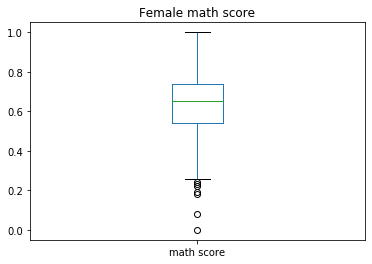

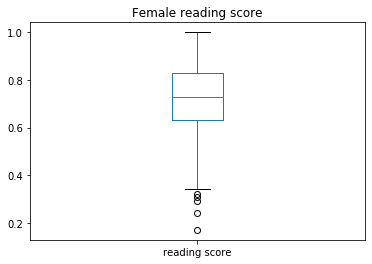

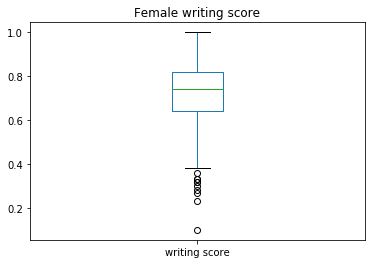

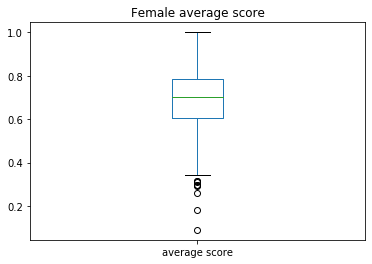

In [24]:
for c in new_data.columns[-4:]:
    new_data.where(new_data['gender']==0).dropna().plot(y=c,kind='box',title='Female '+c)
new_data[new_data.columns[-4:]].where(new_data['gender']==0).dropna().describe()

##### Males

,math score,reading score,writing score,average score
count,482.000000,482.000000,482.000000,482.000000
mean,0.687282,0.654730,0.633112,0.658375
std,0.143563,0.139318,0.141138,0.136988
min,0.270000,0.230000,0.150000,0.230000
25%,0.590000,0.560000,0.530000,0.560000
50%,0.690000,0.660000,0.640000,0.663333
75%,0.790000,0.750000,0.737500,0.762500
max,1.000000,1.000000,1.000000,1.000000


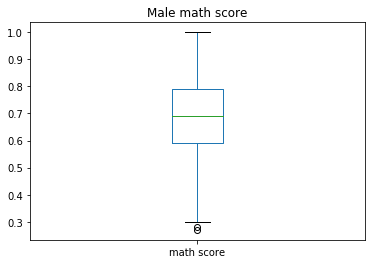

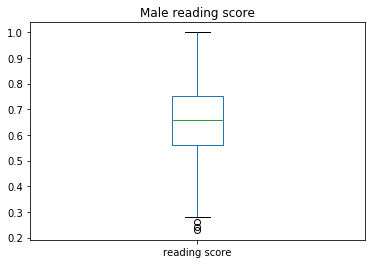

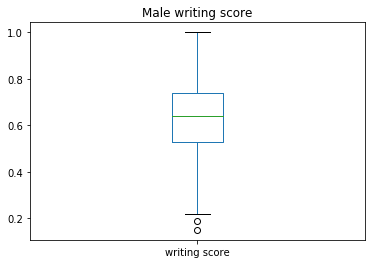

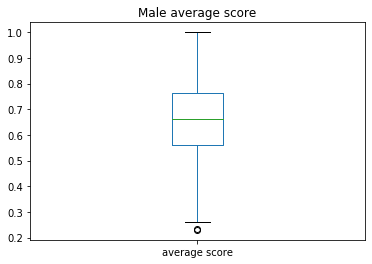

In [25]:
for c in new_data.columns[-4:]:
    new_data.where(new_data['gender']==1).dropna().plot(y=c,kind='box',title='Male '+c)
new_data[new_data.columns[-4:]].where(new_data['gender']==1).dropna().describe()

In [26]:
new_data[['gender']+new_data.columns[-4:].tolist()].corr()[new_data.columns[-4:]].iloc[0]

math score       0.167982
reading score   -0.244313
writing score   -0.301225
average score   -0.130861
Name: gender, dtype: float64

We can see in the 6 graphs above that the distributions for the scores depending on gender are quite different. In the case of females, there are more outliers in the lower bound in all the scores. Nevertheless females actually perform, on average, better than men by 4%.

### Groups

##### Group A

,math score,reading score,writing score,average score
count,89.000000,89.000000,89.000000,89.000000
mean,0.616292,0.646742,0.626742,0.629925
std,0.145230,0.155438,0.154683,0.144446
min,0.280000,0.230000,0.190000,0.233333
25%,0.510000,0.530000,0.510000,0.520000
50%,0.610000,0.640000,0.620000,0.613333
75%,0.710000,0.740000,0.730000,0.730000
max,1.000000,1.000000,0.970000,0.963333


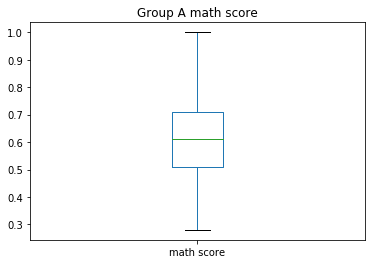

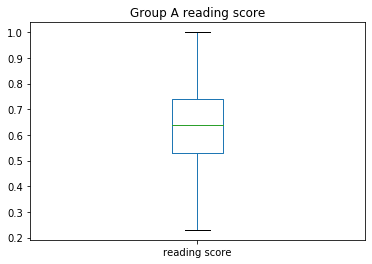

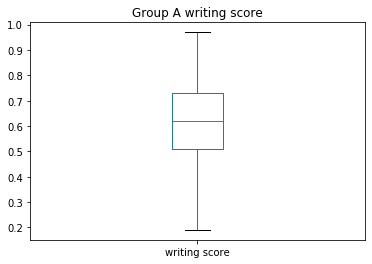

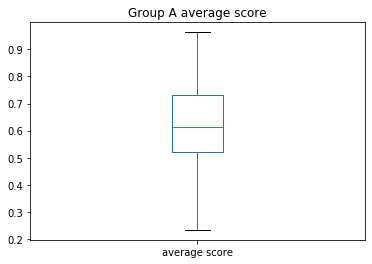

In [27]:
for c in new_data.columns[-4:]:
    new_data.where(new_data['group A']==1).dropna().plot(y=c,kind='box',title='Group A '+c)
new_data[new_data.columns[-4:]].where(new_data['group A']==1).dropna().describe()

##### Group B

,math score,reading score,writing score,average score
count,190.000000,190.000000,190.000000,190.000000
mean,0.634526,0.673526,0.656000,0.654684
std,0.154682,0.151775,0.156252,0.147321
min,0.080000,0.240000,0.150000,0.183333
25%,0.540000,0.560000,0.552500,0.566667
50%,0.630000,0.670000,0.670000,0.650000
75%,0.740000,0.797500,0.780000,0.768333
max,0.970000,0.970000,0.960000,0.966667


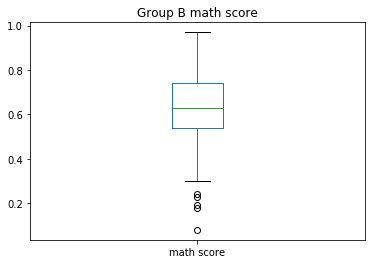

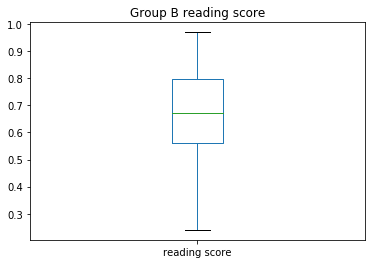

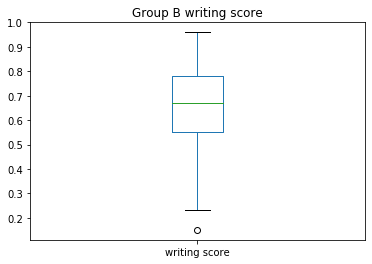

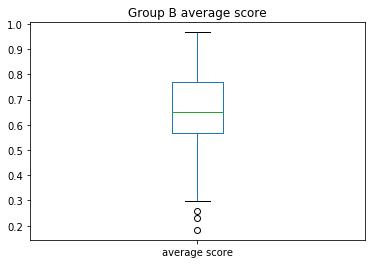

In [28]:
for c in new_data.columns[-4:]:
    new_data.where(new_data['group B']==1).dropna().plot(y=c,kind='box',title='Group B '+c)
new_data[new_data.columns[-4:]].where(new_data['group B']==1).dropna().describe()

##### Group C

,math score,reading score,writing score,average score
count,319.000000,319.000000,319.000000,319.000000
mean,0.644639,0.691034,0.678276,0.671317
std,0.148527,0.139970,0.149834,0.138722
min,0.000000,0.170000,0.100000,0.090000
25%,0.550000,0.600000,0.570000,0.576667
50%,0.650000,0.710000,0.680000,0.683333
75%,0.740000,0.785000,0.790000,0.770000
max,0.980000,1.000000,1.000000,0.986667


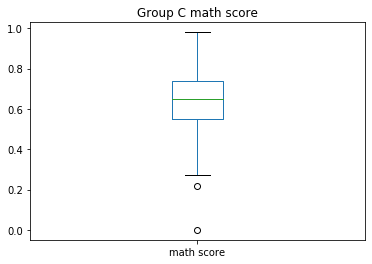

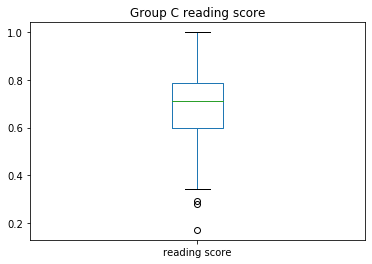

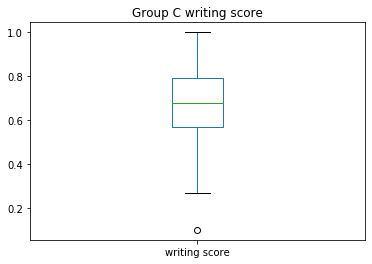

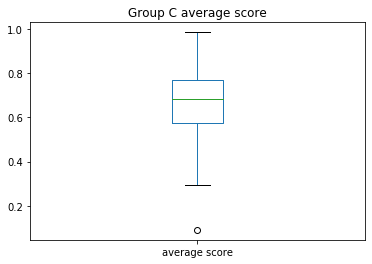

In [29]:
for c in new_data.columns[-4:]:
    new_data.where(new_data['group C']==1).dropna().plot(y=c,kind='box',title='Group C '+c)
new_data[new_data.columns[-4:]].where(new_data['group C']==1).dropna().describe()

##### Group D

,math score,reading score,writing score,average score
count,262.000000,262.000000,262.000000,262.000000
mean,0.673626,0.700305,0.701450,0.691794
std,0.137694,0.138953,0.143677,0.132528
min,0.260000,0.310000,0.320000,0.310000
25%,0.590000,0.602500,0.610000,0.603333
50%,0.690000,0.710000,0.720000,0.700000
75%,0.770000,0.790000,0.800000,0.785833
max,1.000000,1.000000,1.000000,0.990000


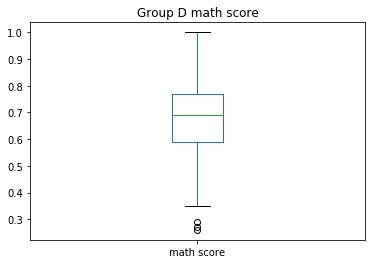

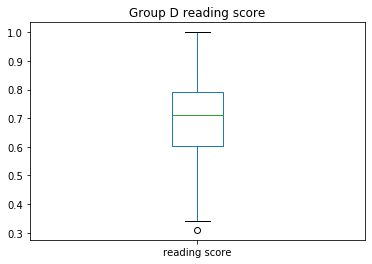

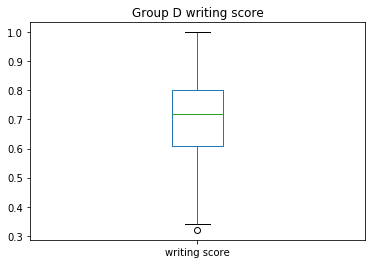

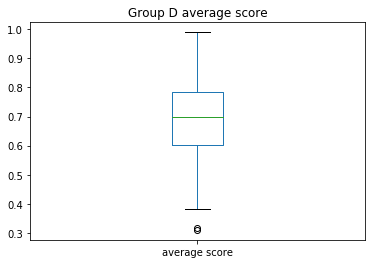

In [30]:
for c in new_data.columns[-4:]:
    new_data.where(new_data['group D']==1).dropna().plot(y=c,kind='box',title='Group D '+c)
new_data[new_data.columns[-4:]].where(new_data['group D']==1).dropna().describe()

##### Group E

,math score,reading score,writing score,average score
count,140.000000,140.000000,140.000000,140.000000
mean,0.738214,0.730286,0.714071,0.727524
std,0.155343,0.148740,0.151139,0.145650
min,0.300000,0.260000,0.220000,0.260000
25%,0.647500,0.630000,0.620000,0.646667
50%,0.745000,0.740000,0.720000,0.735000
75%,0.850000,0.840000,0.802500,0.824167
max,1.000000,1.000000,1.000000,1.000000


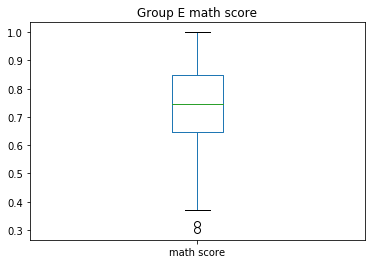

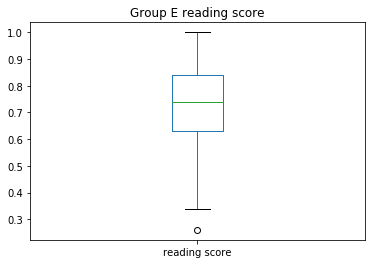

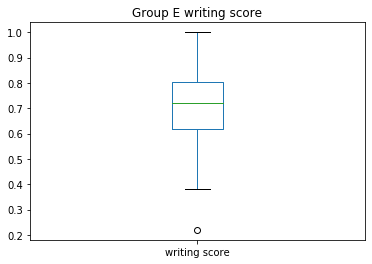

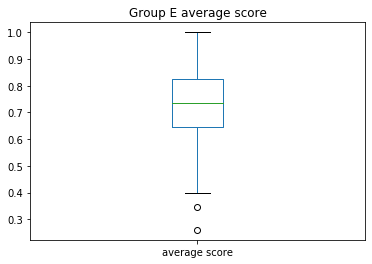

In [31]:
for c in new_data.columns[-4:]:
    new_data.where(new_data['group E']==1).dropna().plot(y=c,kind='box',title='Group E '+c)
new_data[new_data.columns[-4:]].where(new_data['group E']==1).dropna().describe()

In [32]:
new_data[['group A','group B','group C','group D','group E']+new_data.columns[-4:].tolist()].corr()[new_data.columns[-4:]].iloc[:-4]

,math score,reading score,writing score,average score
group A,-0.091977,-0.096274,-0.110714,-0.104803
group B,-0.084250,-0.060283,-0.078254,-0.078247
group C,-0.073387,-0.003074,-0.010203,-0.030691
group D,0.050071,0.035177,0.082032,0.058902
group E,0.205855,0.106712,0.089077,0.141050


In the case of groups we see many things. For example, the group performed best on average, has at least 1 one in each subject, few outliers, but didn´t had the smallest standard deviation of all. In another way the group that performed the worst on average, didn´t had any outliers and had at least 1 one in both reading and mathematics. Neverless 3 groups performed under average and the rest above average in the entire dataset

### Parental Level Education

##### Associate Degree

,math score,reading score,writing score,average score
count,222.000000,222.000000,222.000000,222.000000
mean,0.678829,0.709279,0.698964,0.695691
std,0.151121,0.138689,0.143111,0.136709
min,0.260000,0.310000,0.350000,0.316667
25%,0.570000,0.610000,0.580000,0.586667
50%,0.670000,0.725000,0.705000,0.696667
75%,0.800000,0.810000,0.800000,0.790000
max,1.000000,1.000000,1.000000,1.000000


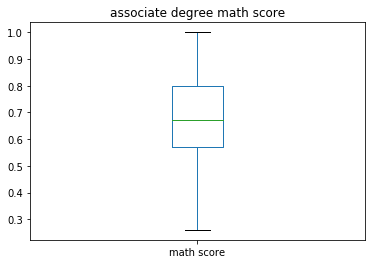

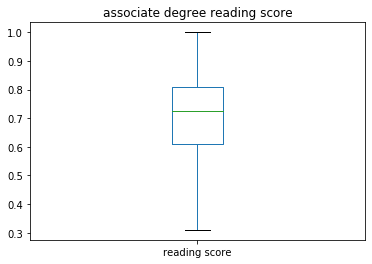

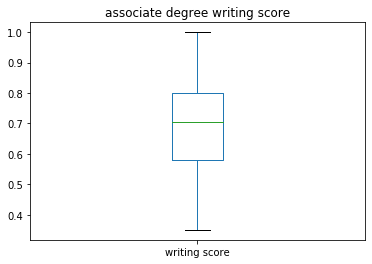

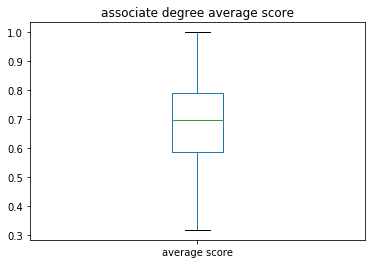

In [33]:
for c in new_data.columns[-4:]:
    new_data.where(new_data['associate degree']==1).dropna().plot(y=c,kind='box',title='associate degree '+c)
new_data[new_data.columns[-4:]].where(new_data['associate degree']==1).dropna().describe()

##### Bachelor Degree

,math score,reading score,writing score,average score
count,118.000000,118.000000,118.000000,118.000000
mean,0.693898,0.730000,0.733814,0.719237
std,0.149438,0.142853,0.147283,0.139466
min,0.290000,0.410000,0.380000,0.390000
25%,0.610000,0.630000,0.625000,0.640833
50%,0.680000,0.730000,0.740000,0.711667
75%,0.790000,0.827500,0.830000,0.806667
max,1.000000,1.000000,1.000000,1.000000


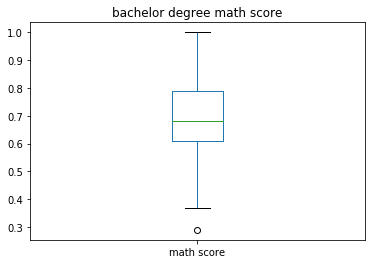

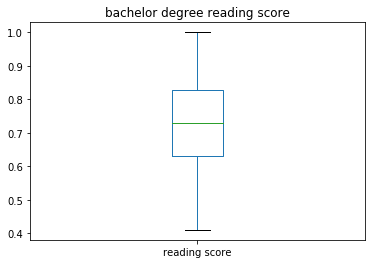

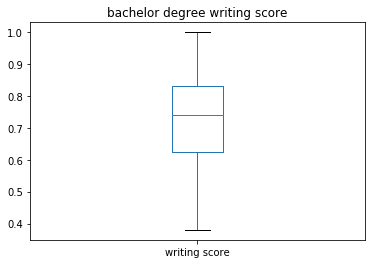

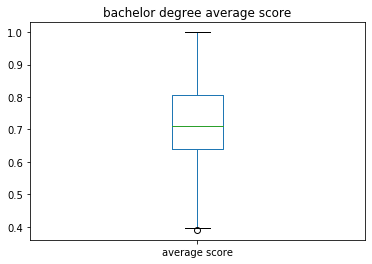

In [34]:
for c in new_data.columns[-4:]:
    new_data.where(new_data['bachelor degree']==1).dropna().plot(y=c,kind='box',title='bachelor degree '+c)
new_data[new_data.columns[-4:]].where(new_data['bachelor degree']==1).dropna().describe()

##### High School

,math score,reading score,writing score,average score
count,196.000000,196.000000,196.000000,196.000000
mean,0.621378,0.647041,0.624490,0.630969
std,0.145397,0.141321,0.140859,0.135106
min,0.080000,0.240000,0.150000,0.183333
25%,0.537500,0.540000,0.520000,0.539167
50%,0.630000,0.660000,0.640000,0.650000
75%,0.720000,0.742500,0.730000,0.726667
max,0.990000,0.990000,1.000000,0.956667


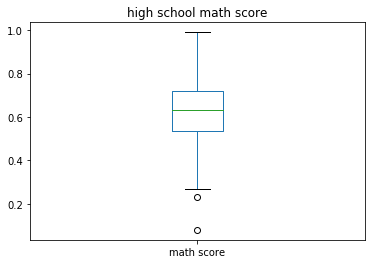

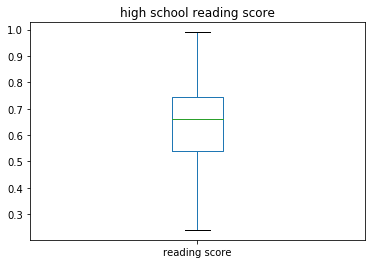

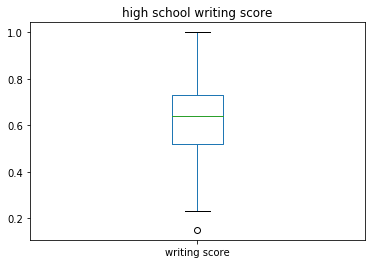

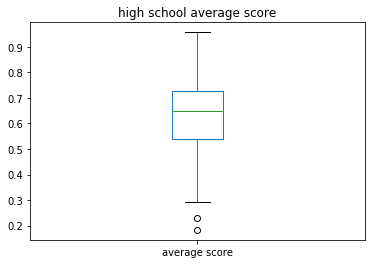

In [35]:
for c in new_data.columns[-4:]:
    new_data.where(new_data['high school']==1).dropna().plot(y=c,kind='box',title='high school '+c)
new_data[new_data.columns[-4:]].where(new_data['high school']==1).dropna().describe()

##### Master Degree

,math score,reading score,writing score,average score
count,59.000000,59.000000,59.000000,59.000000
mean,0.697458,0.753729,0.756780,0.735989
std,0.151539,0.137752,0.137307,0.136010
min,0.400000,0.420000,0.460000,0.446667
25%,0.555000,0.655000,0.670000,0.631667
50%,0.730000,0.760000,0.750000,0.733333
75%,0.810000,0.845000,0.850000,0.855000
max,0.950000,1.000000,1.000000,0.976667


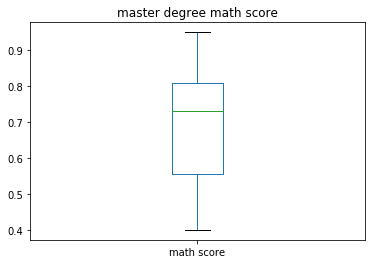

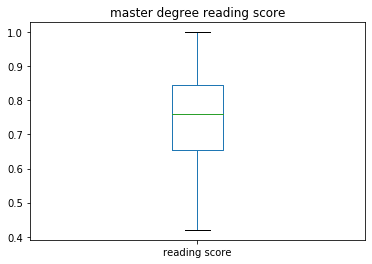

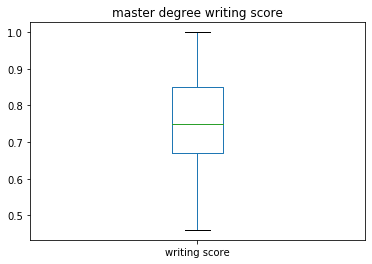

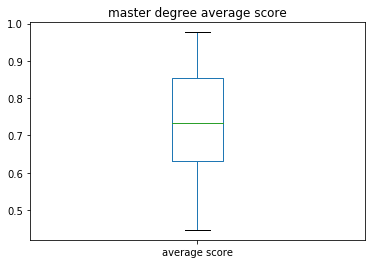

In [36]:
for c in new_data.columns[-4:]:
    new_data.where(new_data['master degree']==1).dropna().plot(y=c,kind='box',title='master degree '+c)
new_data[new_data.columns[-4:]].where(new_data['master degree']==1).dropna().describe()

##### Some College

,math score,reading score,writing score,average score
count,226.000000,226.000000,226.000000,226.000000
mean,0.671283,0.694602,0.688407,0.684764
std,0.143129,0.140570,0.150123,0.137110
min,0.190000,0.230000,0.190000,0.233333
25%,0.590000,0.600000,0.600000,0.600000
50%,0.675000,0.705000,0.700000,0.686667
75%,0.760000,0.797500,0.790000,0.780000
max,1.000000,1.000000,0.990000,0.990000


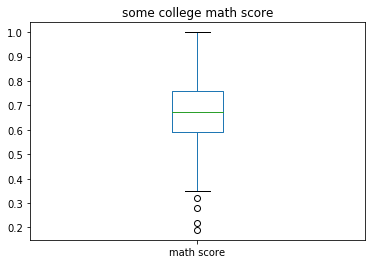

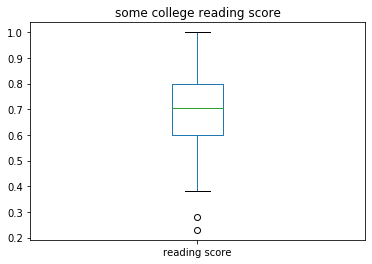

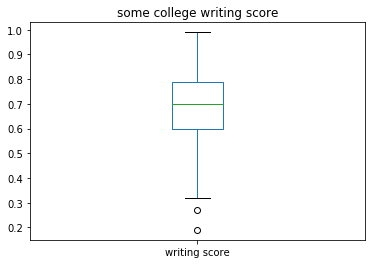

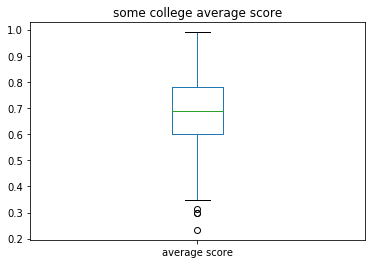

In [37]:
for c in new_data.columns[-4:]:
    new_data.where(new_data['some college']==1).dropna().plot(y=c,kind='box',title='some college '+c)
new_data[new_data.columns[-4:]].where(new_data['some college']==1).dropna().describe()

##### Some High School

,math score,reading score,writing score,average score
count,179.000000,179.000000,179.000000,179.000000
mean,0.634972,0.669385,0.648883,0.651080
std,0.159280,0.154793,0.157362,0.149841
min,0.000000,0.170000,0.100000,0.090000
25%,0.530000,0.565000,0.540000,0.556667
50%,0.650000,0.670000,0.660000,0.666667
75%,0.740000,0.790000,0.770000,0.765000
max,0.970000,1.000000,1.000000,0.990000


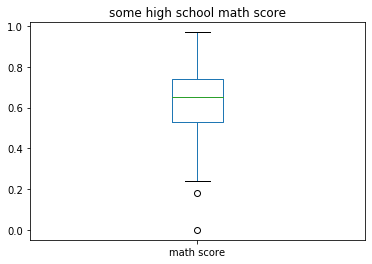

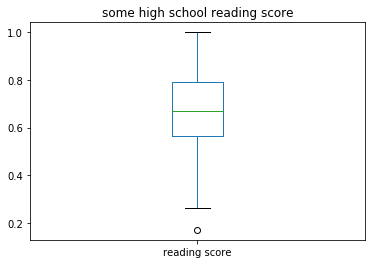

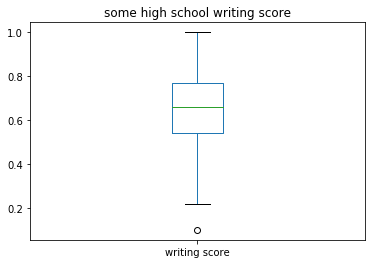

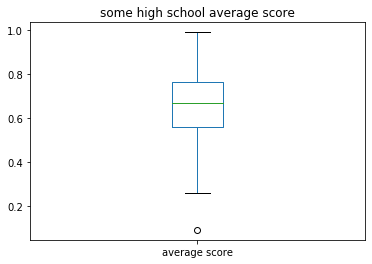

In [38]:
for c in new_data.columns[-4:]:
    new_data.where(new_data['some high school']==1).dropna().plot(y=c,kind='box',title='some high school '+c)
new_data[new_data.columns[-4:]].where(new_data['some high school']==1).dropna().describe()

In [39]:
new_data[['associate degree', 'bachelor degree', 'high school',
          'master degree','some college',
          'some high school']+new_data.columns[-4:].tolist()].corr()[new_data.columns[-4:]].iloc[:-4]

,math score,reading score,writing score,average score
associate degree,0.063228,0.064386,0.064799,0.067414
bachelor degree,0.079664,0.096024,0.128297,0.106599
high school,-0.128725,-0.151068,-0.182211,-0.161936
master degree,0.060417,0.106452,0.125693,0.102411
some college,0.037056,0.010782,0.027989,0.026761
some high school,-0.079852,-0.071369,-0.097326,-0.087247


We can see that the parents education can actually affect the mean scores of their kids, the better education they had it would be reflected positively on their kids.

### Lunch

##### Standard

,math score,reading score,writing score,average score
count,645.000000,645.000000,645.000000,645.000000
mean,0.700341,0.716543,0.708233,0.708372
std,0.136535,0.138306,0.143395,0.131865
min,0.190000,0.260000,0.220000,0.260000
25%,0.610000,0.630000,0.620000,0.623333
50%,0.690000,0.720000,0.720000,0.713333
75%,0.800000,0.820000,0.810000,0.796667
max,1.000000,1.000000,1.000000,1.000000


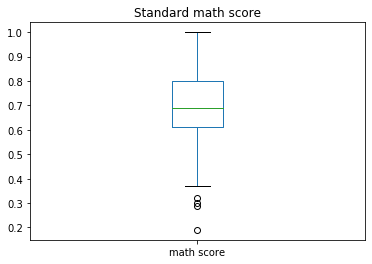

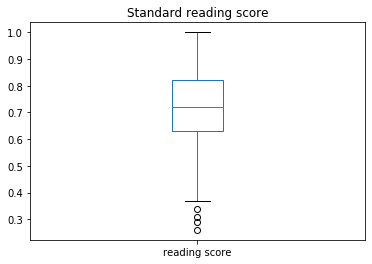

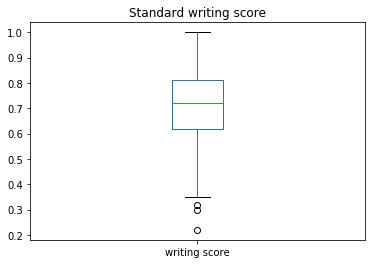

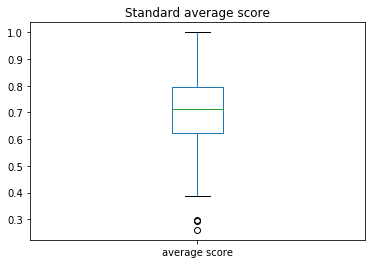

In [40]:
for c in new_data.columns[-4:]:
    new_data.where(new_data['lunch']==1).dropna().plot(y=c,kind='box',title='Standard '+c)
new_data[new_data.columns[-4:]].where(new_data['lunch']==1).dropna().describe()

##### Free/reduced

,math score,reading score,writing score,average score
count,355.000000,355.000000,355.000000,355.000000
mean,0.589211,0.646535,0.630225,0.621991
std,0.151600,0.148953,0.154338,0.144583
min,0.000000,0.170000,0.100000,0.090000
25%,0.490000,0.560000,0.530000,0.528333
50%,0.600000,0.650000,0.640000,0.626667
75%,0.690000,0.750000,0.740000,0.725000
max,1.000000,1.000000,1.000000,0.976667


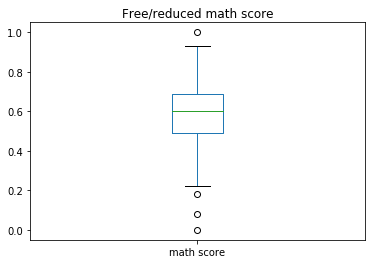

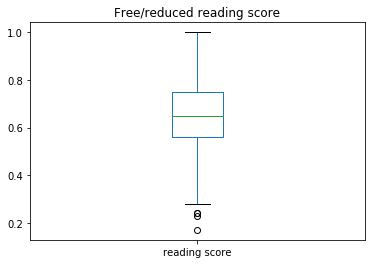

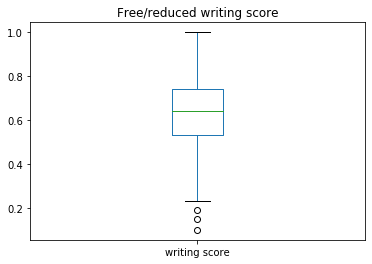

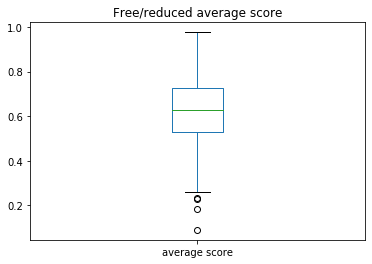

In [41]:
for c in new_data.columns[-4:]:
    new_data.where(new_data['lunch']==0).dropna().plot(y=c,kind='box',title='Free/reduced '+c)
new_data[new_data.columns[-4:]].where(new_data['lunch']==0).dropna().describe()

In [42]:
new_data[['lunch']+new_data.columns[-4:].tolist()].corr()[new_data.columns[-4:]].iloc[:-4]

,math score,reading score,writing score,average score
lunch,0.350877,0.22956,0.245769,0.290064


We see that lunch has a relatively good correlation with the math score 1:3, and the people that had standard lunches perform a 5% better on average

### Test Preparation Course

##### None

,math score,reading score,writing score,average score
count,642.000000,642.000000,642.000000,642.000000
mean,0.640779,0.665343,0.645047,0.650389
std,0.151924,0.144639,0.149997,0.141867
min,0.000000,0.170000,0.100000,0.090000
25%,0.540000,0.570000,0.540000,0.554167
50%,0.640000,0.670000,0.650000,0.653333
75%,0.747500,0.760000,0.740000,0.750000
max,1.000000,1.000000,1.000000,1.000000


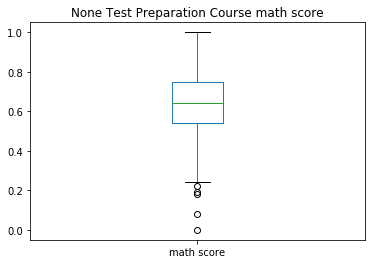

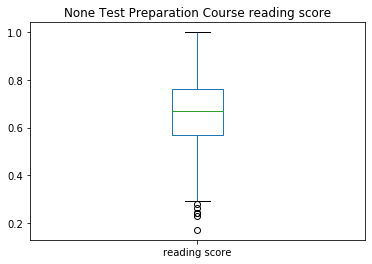

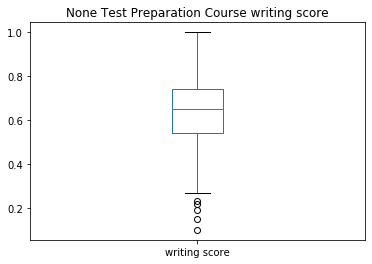

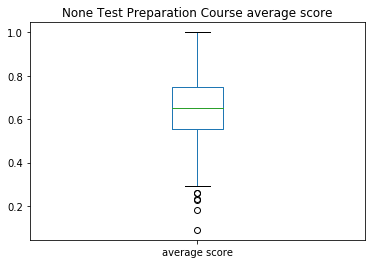

In [43]:
for c in new_data.columns[-4:]:
    new_data.where(new_data['test preparation course']==1).dropna().plot(y=c,kind='box',title='None Test Preparation Course '+c)
new_data[new_data.columns[-4:]].where(new_data['test preparation course']==1).dropna().describe()

##### Did completed a course

,math score,reading score,writing score,average score
count,358.000000,358.000000,358.000000,358.000000
mean,0.696955,0.738939,0.744190,0.726695
std,0.144447,0.136384,0.133753,0.130370
min,0.230000,0.370000,0.360000,0.343333
25%,0.600000,0.650000,0.660000,0.650000
50%,0.690000,0.750000,0.760000,0.735000
75%,0.790000,0.840000,0.830000,0.821667
max,1.000000,1.000000,1.000000,1.000000


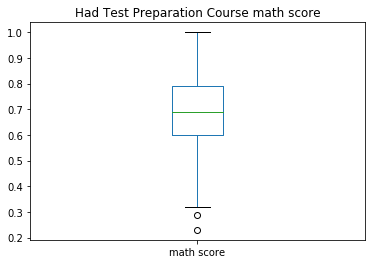

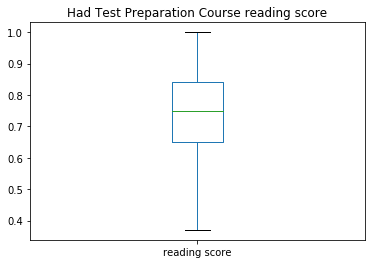

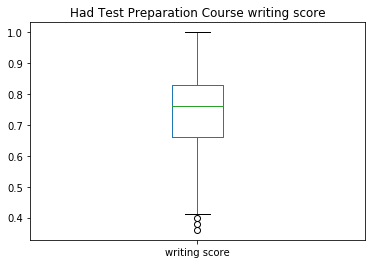

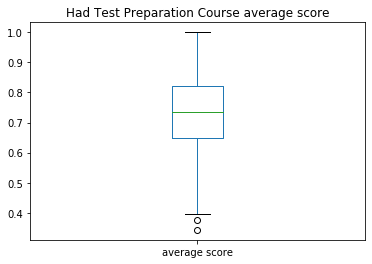

In [44]:
for c in new_data.columns[-4:]:
    new_data.where(new_data['test preparation course']==0).dropna().plot(y=c,kind='box',title='Had Test Preparation Course '+c)
new_data[new_data.columns[-4:]].where(new_data['test preparation course']==0).dropna().describe()

In [45]:
new_data[['test preparation course']+new_data.columns[-4:].tolist()].corr()[new_data.columns[-4:]].iloc[:-4]

,math score,reading score,writing score,average score
test preparation course,-0.177702,-0.24178,-0.312946,-0.25671


We can see that studying actually increases the mean average score by 7%, but still we can se in both groups there were people that achive ones in their scores.

# Splitting the Dataset into Train, Validation, and Test sets
### 60:20:20 split
### 600:200:200 split

In [46]:
train, testVal =train_test_split(new_data,test_size=0.4,random_state=1)
test,validation=train_test_split(testVal,test_size=0.5,random_state=1)
print('Train set:',len(train))
print('Validation set:',len(validation))
print('Test set:',len(test))

Train set: 600
Validation set: 200
Test set: 200


# Refine and Evaluate Your Model

we are going to make models for each of the original categories (gender,race/ethnicity,parental level of education,lunch,test preparation course), see how it reflects on each of the different scores (math score,reading score,writing score), and in the end see how they reflect the average score.

this will be done using a ridge regression for alpha between [-9,9]

For calculating error we are going to use MSE, so we can increment our accurancy by penalizing the biggests mistakes.

In [47]:
lambdas=np.linspace(-9,10,30)
lambdas

array([-9.        , -8.34482759, -7.68965517, -7.03448276, -6.37931034,
       -5.72413793, -5.06896552, -4.4137931 , -3.75862069, -3.10344828,
       -2.44827586, -1.79310345, -1.13793103, -0.48275862,  0.17241379,
        0.82758621,  1.48275862,  2.13793103,  2.79310345,  3.44827586,
        4.10344828,  4.75862069,  5.4137931 ,  6.06896552,  6.72413793,
        7.37931034,  8.03448276,  8.68965517,  9.34482759, 10.        ])

##### Gender Model
###### -Math Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.022574065227669474
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.02257406522767783
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.022574065227715514
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.022574065227885905
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.02257406522865621
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.022574065232138164
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.02257406524787794
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.022574065319027205
--------------------------------

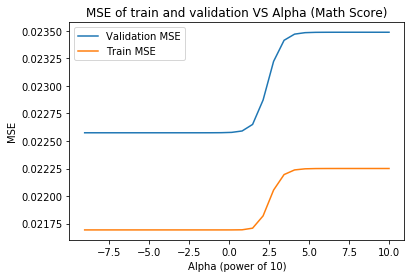

In [48]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train['gender'].values.reshape((-1,1)),train['math score'])
    preds=model.predict(validation['gender'].values.reshape((-1,1)))
    MSE=sum([(r-p)**2 for r,p in zip(validation['math score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['math score'],model.predict(train['gender'].values.reshape((-1,1))))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha (Math Score)')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

We see that the best model might have a high complexity for the gender feature since the best MSE is achivied with a low alpha.

Now we calculate the generalaization error

In [49]:
preds=bestModel.predict(test['gender'].values.reshape((-1,1)))
MSE=sum([(r-p)**2 for r,p in zip(test['math score'],preds)])/len(preds)
print('MSE for test set Math Score: ', MSE)

MSE for test set Math Score:  0.02398411001483309


###### -Reading Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.01900320990809008
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.01900320990807442
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.019003209908003634
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.01900320990768366
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.01900320990623731
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.019003209899699267
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.019003209870145026
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.01900320973654951
----------------------------------

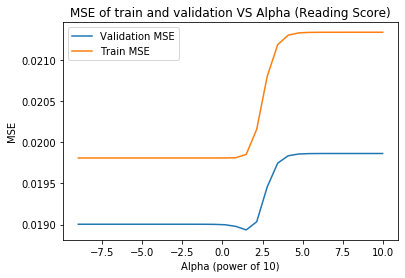

In [50]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train['gender'].values.reshape((-1,1)),train['reading score'])
    preds=model.predict(validation['gender'].values.reshape((-1,1)))
    MSE=sum([(r-p)**2 for r,p in zip(validation['reading score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['reading score'],model.predict(train['gender'].values.reshape((-1,1))))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha (Reading Score)')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

We see that the best model might have a high complexity for the gender feature since the best MSE is achivied with a low alpha.

Now we calculate the generalaization error

In [51]:
preds=bestModel.predict(test['gender'].values.reshape((-1,1)))
MSE=sum([(r-p)**2 for r,p in zip(test['reading score'],preds)])/len(preds)
print('MSE for test set Reading Score: ', MSE)

MSE for test set Reading Score:  0.021682737817237428


###### -Writing Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.020383026847223897
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.02038302684720926
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.020383026847143007
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.020383026846843545
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.02038302684548989
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.020383026839370953
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.020383026811711096
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.02038302668667889
--------------------------------

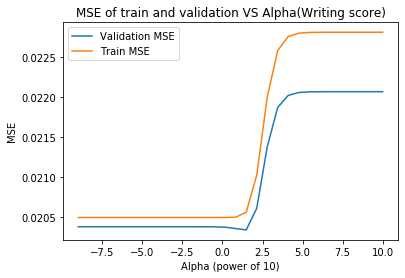

In [52]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train['gender'].values.reshape((-1,1)),train['writing score'])
    preds=model.predict(validation['gender'].values.reshape((-1,1)))
    MSE=sum([(r-p)**2 for r,p in zip(validation['writing score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['writing score'],model.predict(train['gender'].values.reshape((-1,1))))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha(Writing score)')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

We see that the best model might have a high complexity for the gender feature since the best MSE is achivied with a low alpha.

Now we calculate the generalaization error

In [53]:
preds=bestModel.predict(test['gender'].values.reshape((-1,1)))
MSE=sum([(r-p)**2 for r,p in zip(test['writing score'],preds)])/len(preds)
print('MSE for test set writing Score: ', MSE)

MSE for test set writing Score:  0.023013780061304216


###### Average Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.019532245887085492
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.019532245887078005
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.0195322458870442
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.019532245886891376
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.01953224588620056
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.01953224588307776
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.019532245868961615
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.019532245805151723
---------------------------------

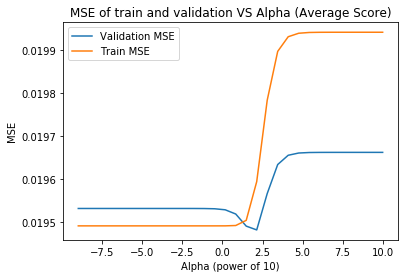

In [54]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train['gender'].values.reshape((-1,1)),train['average score'])
    preds=model.predict(validation['gender'].values.reshape((-1,1)))
    MSE=sum([(r-p)**2 for r,p in zip(validation['average score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['average score'],model.predict(train['gender'].values.reshape((-1,1))))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha (Average Score)')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

We see that the best model might have a lower complexity than the other models seen for this feature because it penalizes more the complexity

Now we calculate the generalaization error

In [55]:
preds=bestModel.predict(test['gender'].values.reshape((-1,1)))
MSE=sum([(r-p)**2 for r,p in zip(test['average score'],preds)])/len(preds)
print('MSE for test set average score: ', MSE)

MSE for test set average score:  0.021817606680576668


##### Race/Ethnicity Model
###### -Math Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.021757852351217907
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.02175785235125594
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.02175785235142783
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.02175785235220492
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.02175785235571763
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.021757852371596272
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.021757852443373377
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.021757852767831282
---------------------------------

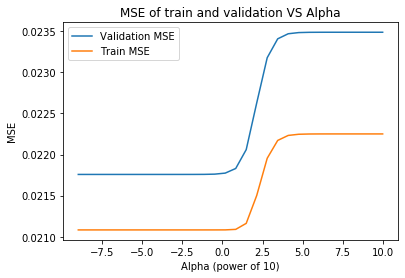

In [56]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train[['group A','group B','group C','group D','group E']],train['math score'])
    preds=model.predict(validation[['group A','group B','group C','group D','group E']])
    MSE=sum([(r-p)**2 for r,p in zip(validation['math score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['math score'],model.predict(train[['group A','group B','group C','group D','group E']]))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

We see that the best model might have really high complexity because it has the smallest alpha possible.

Now we calculate the generalaization error

In [57]:
preds=bestModel.predict(test[['group A','group B','group C','group D','group E']])
MSE=sum([(r-p)**2 for r,p in zip(test['math score'],preds)])/len(preds)
print('MSE for test set Math Score: ', MSE)

MSE for test set Math Score:  0.02372989201447016


###### -Reading Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.019232547068647646
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.019232547068667543
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.01923254706875758
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.019232547069164618
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.01923254707100445
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.019232547079321257
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.019232547116916167
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.019232547286858363
-------------------------------

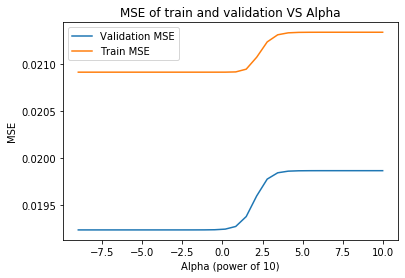

In [58]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train[['group A','group B','group C','group D','group E']],train['reading score'])
    preds=model.predict(validation[['group A','group B','group C','group D','group E']])
    MSE=sum([(r-p)**2 for r,p in zip(validation['reading score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['reading score'],model.predict(train[['group A','group B','group C','group D','group E']]))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

We see that the best model might have really high complexity because it has the smallest alpha possible.

Now we calculate the generalaization error

In [59]:
preds=bestModel.predict(test[['group A','group B','group C','group D','group E']])
MSE=sum([(r-p)**2 for r,p in zip(test['reading score'],preds)])/len(preds)
print('MSE for test set Reading Score: ', MSE)

MSE for test set Reading Score:  0.022316533418641992


###### -Writing Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.021511220390213474
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.021511220390227584
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.02151122039029133
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.02151122039057946
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.02151122039188194
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.021511220397769537
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.021511220424383633
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.021511220544688712
--------------------------------

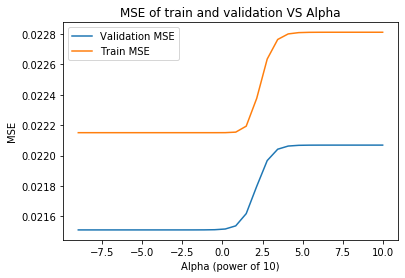

In [60]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train[['group A','group B','group C','group D','group E']],train['writing score'])
    preds=model.predict(validation[['group A','group B','group C','group D','group E']])
    MSE=sum([(r-p)**2 for r,p in zip(validation['writing score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['writing score'],model.predict(train[['group A','group B','group C','group D','group E']]))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

We see that the best model might have really high complexity because it has the smallest alpha possible.

Now we calculate the generalaization error

In [61]:
preds=bestModel.predict(test[['group A','group B','group C','group D','group E']])
MSE=sum([(r-p)**2 for r,p in zip(test['writing score'],preds)])/len(preds)
print('MSE for test set writing Score: ', MSE)

MSE for test set writing Score:  0.02432281838571152


###### Average Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.01873055826340837
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.01873055826343345
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.018730558263546818
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.018730558264059317
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.018730558266375916
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.01873055827684786
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.018730558324184743
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.018730558538164105
--------------------------------

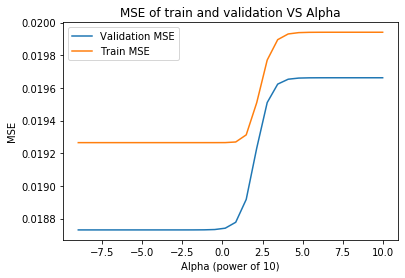

In [62]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train[['group A','group B','group C','group D','group E']],train['average score'])
    preds=model.predict(validation[['group A','group B','group C','group D','group E']])
    MSE=sum([(r-p)**2 for r,p in zip(validation['average score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['average score'],model.predict(train[['group A','group B','group C','group D','group E']]))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

We see that the best model might have really high complexity because it has the smallest alpha possible.

Now we calculate the generalaization error

In [63]:
preds=bestModel.predict(test[['group A','group B','group C','group D','group E']])
MSE=sum([(r-p)**2 for r,p in zip(test['average score'],preds)])/len(preds)
print('MSE for test set average score: ', MSE)

MSE for test set average score:  0.021582651456023064


##### Parental Education Level Model
###### -Math Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.023286746779763737
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.02328674677973517
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.023286746779606182
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.02328674677902306
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.0232867467763871
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.02328674676447172
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.023286746710609933
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.02328674646713583
-----------------------------------

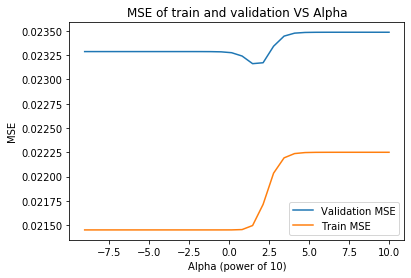

In [64]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train[['associate degree', 'bachelor degree', 'high school', 'master degree',
       'some college', 'some high school']],train['math score'])
    preds=model.predict(validation[['associate degree', 'bachelor degree', 'high school', 'master degree',
       'some college', 'some high school']])
    MSE=sum([(r-p)**2 for r,p in zip(validation['math score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['math score'],model.predict(train[['associate degree', 'bachelor degree', 'high school', 'master degree',
       'some college', 'some high school']]))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

We see that the best model might have high complexity but still smaller than the other models for the previous features

Now we calculate the generalaization error

In [65]:
preds=bestModel.predict(test[['associate degree', 'bachelor degree', 'high school', 'master degree',
       'some college', 'some high school']])
MSE=sum([(r-p)**2 for r,p in zip(test['math score'],preds)])/len(preds)
print('MSE for test set Math Score: ', MSE)

MSE for test set Math Score:  0.02435247199905342


###### -Reading Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.01973029817836148
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.019730298178328064
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.019730298178177008
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.01973029817749423
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.019730298174407714
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.019730298160455715
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.019730298097387664
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.019730297812298115
-------------------------------

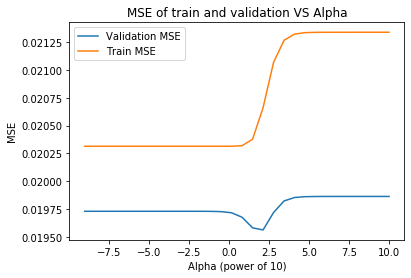

In [66]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train[['associate degree', 'bachelor degree', 'high school', 'master degree',
       'some college', 'some high school']],train['reading score'])
    preds=model.predict(validation[['associate degree', 'bachelor degree', 'high school', 'master degree',
       'some college', 'some high school']])
    MSE=sum([(r-p)**2 for r,p in zip(validation['reading score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['reading score'],model.predict(train[['associate degree', 'bachelor degree', 'high school', 'master degree',
       'some college', 'some high school']]))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

It has the same complexity as the model before for the same feature

Now we calculate the generalaization error

In [67]:
preds=bestModel.predict(test[['associate degree', 'bachelor degree', 'high school', 'master degree',
       'some college', 'some high school']])
MSE=sum([(r-p)**2 for r,p in zip(test['reading score'],preds)])/len(preds)
print('MSE for test set Reading Score: ', MSE)

MSE for test set Reading Score:  0.02258436614749226


###### -Writing Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.021207242531231005
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.021207242531216277
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.02120724253114963
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.021207242530848363
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.02120724252948654
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.021207242523330685
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.021207242495503875
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.02120724236971727
--------------------------------

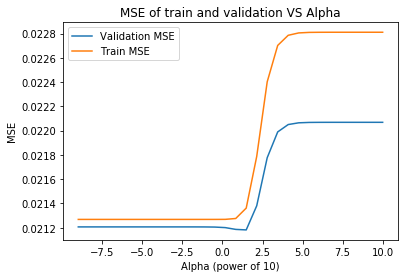

In [68]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train[['associate degree', 'bachelor degree', 'high school', 'master degree',
       'some college', 'some high school']],train['writing score'])
    preds=model.predict(validation[['associate degree', 'bachelor degree', 'high school', 'master degree',
       'some college', 'some high school']])
    MSE=sum([(r-p)**2 for r,p in zip(validation['writing score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['writing score'],model.predict(train[['associate degree', 'bachelor degree', 'high school', 'master degree',
       'some college', 'some high school']]))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

We see that the best model might have really high complexity,but smaller than the ones before.

Now we calculate the generalaization error

In [69]:
preds=bestModel.predict(test[['associate degree', 'bachelor degree', 'high school', 'master degree',
       'some college', 'some high school']])
MSE=sum([(r-p)**2 for r,p in zip(test['writing score'],preds)])/len(preds)
print('MSE for test set writing Score: ', MSE)

MSE for test set writing Score:  0.024678440200529853


###### Average Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.01928405985614211
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.019284059856115855
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.019284059855997168
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.019284059855460674
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.019284059853035593
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.019284059842073313
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.019284059792519955
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.019284059568521486
------------------------------

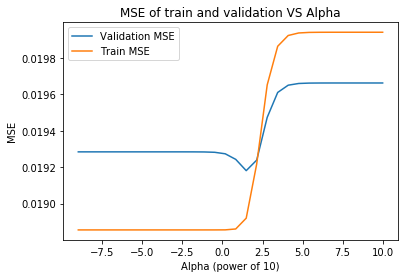

In [70]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train[['associate degree', 'bachelor degree', 'high school', 'master degree',
       'some college', 'some high school']],train['average score'])
    preds=model.predict(validation[['associate degree', 'bachelor degree', 'high school', 'master degree',
       'some college', 'some high school']])
    MSE=sum([(r-p)**2 for r,p in zip(validation['average score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['average score'],model.predict(train[['associate degree', 'bachelor degree', 'high school', 'master degree',
       'some college', 'some high school']]))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

It has a relative high complexity

Now we calculate the generalaization error

In [71]:
preds=bestModel.predict(test[['associate degree', 'bachelor degree', 'high school', 'master degree',
       'some college', 'some high school']])
MSE=sum([(r-p)**2 for r,p in zip(test['average score'],preds)])/len(preds)
print('MSE for test set average score: ', MSE)

MSE for test set average score:  0.02189094181095825


##### Lunch Model
###### -Math Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.020121483648474072
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.0201214836484929
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.02012148364857807
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.020121483648963098
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.020121483650703546
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.020121483658570933
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.020121483694134377
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.02012148385489376
---------------------------------

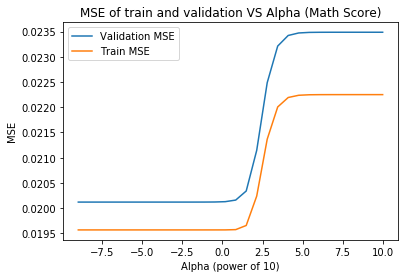

In [72]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train['lunch'].values.reshape((-1,1)),train['math score'])
    preds=model.predict(validation['lunch'].values.reshape((-1,1)))
    MSE=sum([(r-p)**2 for r,p in zip(validation['math score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['math score'],model.predict(train['lunch'].values.reshape((-1,1))))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha (Math Score)')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

We see that the best model might have really high complexity because it has the smallest alpha possible.

Now we calculate the generalaization error

In [73]:
preds=bestModel.predict(test['lunch'].values.reshape((-1,1)))
MSE=sum([(r-p)**2 for r,p in zip(test['math score'],preds)])/len(preds)
print('MSE for test set Math Score: ', MSE)

MSE for test set Math Score:  0.02191234258801995


###### -Reading Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.018220409217750515
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.01822040921777554
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.01822040921788852
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.018220409218399264
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.018220409220707973
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.018220409231144145
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.01822040927831935
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.018220409491567984
--------------------------------

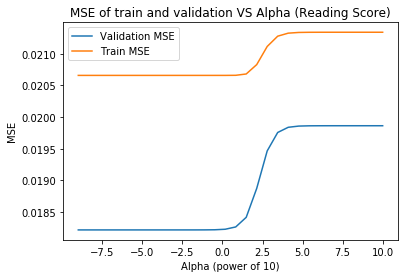

In [74]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train['lunch'].values.reshape((-1,1)),train['reading score'])
    preds=model.predict(validation['lunch'].values.reshape((-1,1)))
    MSE=sum([(r-p)**2 for r,p in zip(validation['reading score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['reading score'],model.predict(train['lunch'].values.reshape((-1,1))))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha (Reading Score)')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

We see that the best model might have really high complexity because it has the smallest alpha possible.

Now we calculate the generalaization error

In [75]:
preds=bestModel.predict(test['lunch'].values.reshape((-1,1)))
MSE=sum([(r-p)**2 for r,p in zip(test['reading score'],preds)])/len(preds)
print('MSE for test set Reading Score: ', MSE)

MSE for test set Reading Score:  0.020961393969171377


###### -Writing Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.020199689408218063
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.020199689408242367
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.020199689408352275
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.020199689408848993
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.020199689411094356
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.020199689421244282
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.020199689467125456
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.020199689674524565
-----------------------------

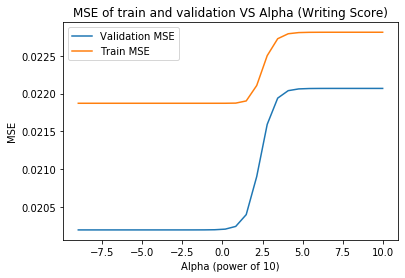

In [76]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train['lunch'].values.reshape((-1,1)),train['writing score'])
    preds=model.predict(validation['lunch'].values.reshape((-1,1)))
    MSE=sum([(r-p)**2 for r,p in zip(validation['writing score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['writing score'],model.predict(train['lunch'].values.reshape((-1,1))))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha (Writing Score)')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

We see that the best model might have really high complexity because it has the smallest alpha possible.

Now we calculate the generalaization error

In [77]:
preds=bestModel.predict(test['lunch'].values.reshape((-1,1)))
MSE=sum([(r-p)**2 for r,p in zip(test['writing score'],preds)])/len(preds)
print('MSE for test set writing Score: ', MSE)

MSE for test set writing Score:  0.022805815329092302


###### Average Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.017384335384640154
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.017384335384665665
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.017384335384780947
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.01738433538530207
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.017384335387657702
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.017384335398306038
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.017384335446440344
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.017384335664024378
------------------------------

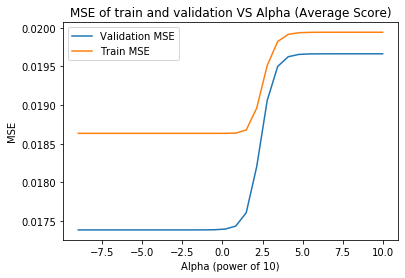

In [78]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train['lunch'].values.reshape((-1,1)),train['average score'])
    preds=model.predict(validation['lunch'].values.reshape((-1,1)))
    MSE=sum([(r-p)**2 for r,p in zip(validation['average score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['average score'],model.predict(train['lunch'].values.reshape((-1,1))))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha (Average Score)')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

We see that the best model might have really high complexity because it has the smallest alpha possible.

Now we calculate the generalaization error

In [79]:
preds=bestModel.predict(test['lunch'].values.reshape((-1,1)))
MSE=sum([(r-p)**2 for r,p in zip(test['average score'],preds)])/len(preds)
print('MSE for test set average score: ', MSE)

MSE for test set average score:  0.019841617719585862


##### Test Preparation Model
###### -Math Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.022309373362891485
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.022309373362907902
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.022309373362982093
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.022309373363317418
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.022309373364833275
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.022309373371685336
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.02230937340265931
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.022309373542672515
------------------------------

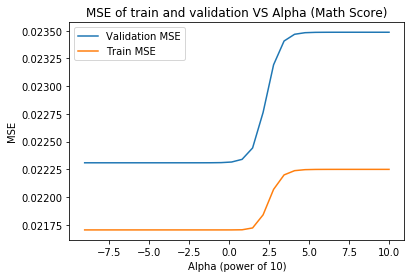

In [80]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train['test preparation course'].values.reshape((-1,1)),train['math score'])
    preds=model.predict(validation['test preparation course'].values.reshape((-1,1)))
    MSE=sum([(r-p)**2 for r,p in zip(validation['math score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['math score'],model.predict(train['test preparation course'].values.reshape((-1,1))))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha (Math Score)')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

We see that the best model might have really high complexity because it has the smallest alpha possible.

Now we calculate the generalaization error

In [81]:
preds=bestModel.predict(test['test preparation course'].values.reshape((-1,1)))
MSE=sum([(r-p)**2 for r,p in zip(test['math score'],preds)])/len(preds)
print('MSE for test set Math Score: ', MSE)

MSE for test set Math Score:  0.023887814844591557


###### -Reading Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.018254189700397105
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.018254189700405772
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.01825418970044492
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.01825418970062195
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.018254189701422178
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.018254189705039475
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.01825418972139092
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.018254189795305367
--------------------------------

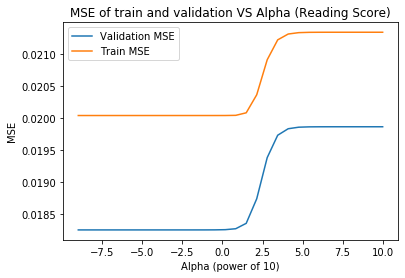

In [82]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train['test preparation course'].values.reshape((-1,1)),train['reading score'])
    preds=model.predict(validation['test preparation course'].values.reshape((-1,1)))
    MSE=sum([(r-p)**2 for r,p in zip(validation['reading score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['reading score'],model.predict(train['test preparation course'].values.reshape((-1,1))))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha (Reading Score)')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

We see that the best model might have really high complexity because it has the smallest alpha possible.

Now we calculate the generalaization error

In [83]:
preds=bestModel.predict(test['test preparation course'].values.reshape((-1,1)))
MSE=sum([(r-p)**2 for r,p in zip(test['reading score'],preds)])/len(preds)
print('MSE for test set Reading Score: ', MSE)

MSE for test set Reading Score:  0.02189865388154558


###### -Writing Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.018890831879488087
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.018890831879518108
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.018890831879653767
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.01889083188026705
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.0188908318830393
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.01889083189557084
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.01889083195221783
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.018890832208282363
----------------------------------

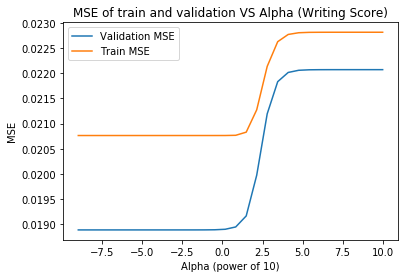

In [84]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train['test preparation course'].values.reshape((-1,1)),train['writing score'])
    preds=model.predict(validation['test preparation course'].values.reshape((-1,1)))
    MSE=sum([(r-p)**2 for r,p in zip(validation['writing score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['writing score'],model.predict(train['test preparation course'].values.reshape((-1,1))))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha (Writing Score)')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

We see that the best model might have really high complexity because it has the smallest alpha possible.

Now we calculate the generalaization error

In [85]:
preds=bestModel.predict(test['test preparation course'].values.reshape((-1,1)))
MSE=sum([(r-p)**2 for r,p in zip(test['writing score'],preds)])/len(preds)
print('MSE for test set writing Score: ', MSE)

MSE for test set writing Score:  0.022917551606776138


###### Average Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.0177409813571112
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.017740981357129877
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.017740981357214306
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.017740981357595952
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.017740981359321083
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.01774098136711934
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.017740981402370203
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.017740981561716503
--------------------------------

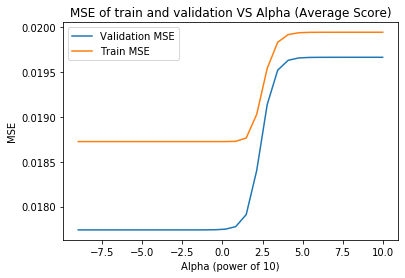

In [86]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train['test preparation course'].values.reshape((-1,1)),train['average score'])
    preds=model.predict(validation['test preparation course'].values.reshape((-1,1)))
    MSE=sum([(r-p)**2 for r,p in zip(validation['average score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['average score'],model.predict(train['test preparation course'].values.reshape((-1,1))))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha (Average Score)')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

We see that the best model might have really high complexity because it has the smallest alpha possible.

Now we calculate the generalaization error

In [87]:
preds=bestModel.predict(test['test preparation course'].values.reshape((-1,1)))
MSE=sum([(r-p)**2 for r,p in zip(test['average score'],preds)])/len(preds)
print('MSE for test set average score: ', MSE)

MSE for test set average score:  0.02094556319124707


##### All Feature Model
###### -Math Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.016847738202133488
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.016847738202155026
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.01684773820225243
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.016847738202692638
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.016847738204682584
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.01684773821367783
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.01684773825433956
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.01684773843814543
---------------------------------

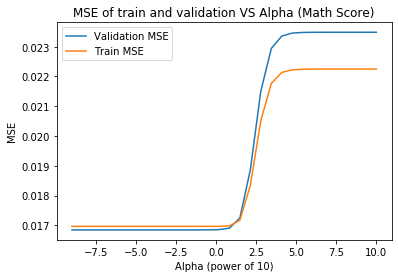

In [88]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train[new_data.columns[:-4]],train['math score'])
    preds=model.predict(validation[new_data.columns[:-4]])
    MSE=sum([(r-p)**2 for r,p in zip(validation['math score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['math score'],model.predict(train[new_data.columns[:-4]]))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha (Math Score)')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

We see that the best model might have really high complexity because it has the smallest alpha possible.

Now we calculate the generalaization error

In [89]:
preds=bestModel.predict(test[new_data.columns[:-4]])
MSE=sum([(r-p)**2 for r,p in zip(test['math score'],preds)])/len(preds)
print('MSE for test set Math Score: ', MSE)

MSE for test set Math Score:  0.018738439375397105


###### -Reading Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.015863204519644944
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.01586320451957793
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.015863204519275115
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.01586320451790624
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.015863204511718423
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.015863204483747294
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.01586320435730792
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.015863203785758225
--------------------------------

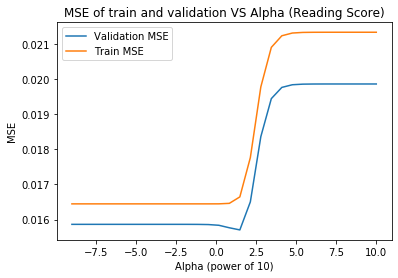

In [90]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train[new_data.columns[:-4]],train['reading score'])
    preds=model.predict(validation[new_data.columns[:-4]])
    MSE=sum([(r-p)**2 for r,p in zip(validation['reading score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['reading score'],model.predict(train[new_data.columns[:-4]]))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha (Reading Score)')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

has a lower complexity than the one before

Now we calculate the generalaization error

In [91]:
preds=bestModel.predict(test[new_data.columns[:-4]])
MSE=sum([(r-p)**2 for r,p in zip(test['reading score'],preds)])/len(preds)
print('MSE for test set Reading Score: ', MSE)

MSE for test set Reading Score:  0.01844106300098884


###### -Writing Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.015067299634438515
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.015067299634376828
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.015067299634097983
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.015067299632837539
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.0150672996271399
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.015067299601384547
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.015067299484961287
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.015067298958688026
-------------------------------

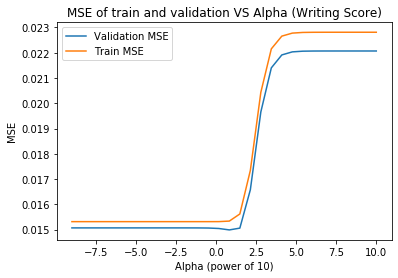

In [92]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train[new_data.columns[:-4]],train['writing score'])
    preds=model.predict(validation[new_data.columns[:-4]])
    MSE=sum([(r-p)**2 for r,p in zip(validation['writing score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['writing score'],model.predict(train[new_data.columns[:-4]]))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha (Writing Score)')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

Has the same complexity as the one shown before.

Now we calculate the generalaization error

In [93]:
preds=bestModel.predict(test[new_data.columns[:-4]])
MSE=sum([(r-p)**2 for r,p in zip(test['writing score'],preds)])/len(preds)
print('MSE for test set writing Score: ', MSE)

MSE for test set writing Score:  0.01693878437160637


###### Average Score

---------------------------------------------------
Alpha of:  1e-09
Validation MSE:  0.014988043138041083
---------------------------------------------------
Alpha of:  4.520353656360241e-09
Validation MSE:  0.01498804313800411
---------------------------------------------------
Alpha of:  2.0433597178569395e-08
Validation MSE:  0.01498804313783701
---------------------------------------------------
Alpha of:  9.236708571873865e-08
Validation MSE:  0.014988043137081644
---------------------------------------------------
Alpha of:  4.1753189365604003e-07
Validation MSE:  0.014988043133667122
---------------------------------------------------
Alpha of:  1.8873918221350957e-06
Validation MSE:  0.014988043118232217
---------------------------------------------------
Alpha of:  8.531678524172814e-06
Validation MSE:  0.014988043048461113
---------------------------------------------------
Alpha of:  3.856620421163472e-05
Validation MSE:  0.014988042733071688
-------------------------------

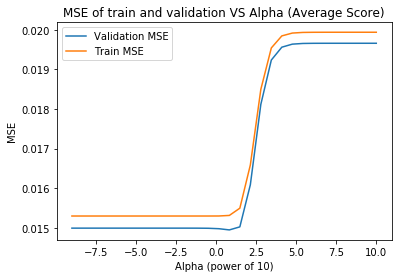

In [94]:
valError=float('inf')
bestModel=None
mses=[]
msesTrain=[]
for power in lambdas:
    print('---------------------------------------------------')
    print('Alpha of: ',10**power)
    model=Ridge(alpha=10**power).fit(train[new_data.columns[:-4]],train['average score'])
    preds=model.predict(validation[new_data.columns[:-4]])
    MSE=sum([(r-p)**2 for r,p in zip(validation['average score'],preds)])/len(preds)
    print('Validation MSE: ',MSE)
    mses.append(MSE)
    msesTrain.append(sum([(r-p)**2 for r,p in zip(train['average score'],model.predict(train[new_data.columns[:-4]]))])/len(train))
    if(MSE<valError):
        bestModel=model
        valError=MSE
print('----------------------------------------------')
print('Best Model: ',bestModel)
plt.title('MSE of train and validation VS Alpha (Average Score)')
plt.xlabel('Alpha (power of 10)')
plt.ylabel('MSE')
plt.plot(lambdas,mses, label='Validation MSE')
plt.plot(lambdas,msesTrain, label='Train MSE')
plt.legend()

Has the same complesxity as the one before

Now we calculate the generalaization error

In [95]:
preds=bestModel.predict(test[new_data.columns[:-4]])
MSE=sum([(r-p)**2 for r,p in zip(test['average score'],preds)])/len(preds)
print('MSE for test set average score: ', MSE)

MSE for test set average score:  0.01707478235435576


# Conclusions

In the end we can conclude that for this dataset the more accurate models tend to have a relative high complexity. Also, in the end the best model was the one that took into account all of the features to predict the scores and the average score, but the true error (Test error) is still too high which could mean a lot of noise that may come due to the many outliers.